### Scientific Question: What gene expression profiles change that result in gastro-esophageal reflux disease?

Gastro-esoaphageal reflux disease (GERD) is a chronic digestive disease featuring acid reflux, eosinophilic esophagitic, disruption of tight junction proteins, and cytokines. This disease is divided into two categories---erosive and non-erosive reflux; however, all include symptoms of heartburn and regurgitation (Okimoto et. al 2018, Monkemuller et. al 2012).

Tight junction genes (Occludin, Claudin-1,-2, ZO-1,-2) are responsible for encoding tight junction proteins of the esophageal mucosa in order to form an intercellular barrier between epithelial cells for regulation of movement across the epithluem (Anderson et. al 2009). Therefore, it is hypothesized that impairment of these tight junction proteins and lack of gene expression lead to esophageal hypersensitvity to acid and the development of GERDs.

Many studies have investigated the strength of association between tight junction genes and GERDs, which are inputted into BMC Gastroenterology (https://bmcgastroenterol.biomedcentral.com/). As stated on their website:

"BMC Gastroenterology is an open access, peer-reviewed journal that considers articles on all aspects of the prevention, diagnosis and management of gastrointestinal and hepatobiliary disorders, as well as related molecular genetics, pathophysiology, and epidemiology."


### Scientific Hypothesis: If tight junction component Claudin-1 gene is overly expressed, gastro-esophageal reflux disease symptoms are more likely to occur.

To answer this scientific question and test my hypothesis, I researched different genes associated with GERDs from the BMC Gastroenterology website. The paper that caught my eye the most "Role of Tight Junction Proteins in Gastreoesophageal Reflux Disease"
(https://bmcgastroenterol.biomedcentral.com/articles/10.1186/1471-230X-12-128), whose study investigated the expression pattern of tight junction proteins (Occludin, Claudin-1,-2, ZO-1,-2) via analysis by histopathy, immunohistochemsitry, and quantitative reverse-transcription polymerase chain reaction.

Theoretically, I would download the DNA sequences of each test group (ERD, NERD, and Control) and import them here to undergo RNA-seq. However, due to complications preventing me from installing pyrpipe to perform RNA-seq, I manually transferred the data from Table 4 for the expression of tight junction-related components in esophageal mucosa onto my Jupyter Notebook here in order to create my heatmap.


In [19]:
# Download package
pip install pyrpipe

SyntaxError: invalid syntax (<ipython-input-19-f4db4a75dc3a>, line 2)

### Load the Packages

Numpy: Fundamental package for adding support for large, multidimensional arrays and matrics, along with a large collection of high level mathematical functions

Pyrpipe: RNA-Seq workflows

Pandas: Data manipulation and analysis

Seaborn: DATA visualization library based on matplotlib

In [ ]:
# Import all packages needed
from pyrpipe import sra, qc, mapping, assembly
import seaborn as sns
import pandas as pd
import numpy as np

### Perform Bioinformatics Analyses

After loading the necessary packages, we can perform RNA-sequencing. RNA-sequencing is a bioinformatics technique that analyzes the transcriptome of gene expression patterns encoded, in which in this project, we aim to analyze the level of gene expression of specific tight junction proteins in relation to patients with differing levels of gastro-esophageal reflux disease symptoms. To perform RNA-sequencing, the DNA sequences acquired are transcribed into mRNA, which are then translated into proteins. By quantifying the amount of mRNA, we can interpret the level of each gene expression.

In the cell below, I will write the theoretical process of coding for RNA-seq.

##### #Import and create a list of DNA sequences from database

runs = ['ERD seq' , 'NERD seq', 'CONTROL seq']

study = 'study'

###### #Create for loop to append each sequence to new list
sraQC = [ ]

for x in runs:
    
    QC = sra.SRA(x, study)
    if QC.download_fast(q):
        sraQC.append(QC)
        
##### #Set parameters for quality control
tgOptions = {"--cores": "5"}

tg = qc.Trimgalore()

##### #Perform quality control
for QC in sraQC:
    
    QC.perform_qc(tg, **tgOpts)
    
##### #Set parameter for star function
starParams = {'--outFilterType':'BySJout','--outSAMtype':'BAM SortedByCoordinate'}

##### #Read alignment to determine which RNA seq match
star = mapping.Star(index = 'index')

##### #Transcript assembly
st = assembly.Stringtie()

##### #Create for loop to perform transcript assembly and read alignment
for QC in sraQC:
    
    bam = star.perform_alignment(QC, **starParams)
    st.perform_assembly(bam, reference_gtf = 'ref.gtf')

### Plotting the Results

In the code below, I transferred Table 4 data (https://bmcgastroenterol.biomedcentral.com/articles/10.1186/1471-230X-12-128) onto my Jupyter Notebook to organize the data prior to plotting the heatmap. 

Heatmaps are a data visualization technique using a color-coding system to represent different values. These 2D graphs are effective for comparing scores, magnitudes, and other values between a large number of subjects. In this project, the color bar represents the level of gene expression with the lightest color signifies the most gene expression at 0.2 and the darkest color signifies the least gene expression at 0. The y-axis is labeled according to the test group: ERD, NERD, or CONTROL. The x-axis is labeled according to the gene being expressed: claudin-1, claudin-2, occludin, ZO-1, ZO-2.

In [20]:
# Transfer gene expression data
claudin1 = [0.078, 0.15, 0.2]
claudin2 = [0.000038, 0.0002, 0.000083]
occludin = [0.041, 0.060, 0.035]
zo1 = [0.006, 0.0081, 0.0077]
zo2 = [0.011, 0.019, 0.021]

# Create dictionary for gene expression data as Research
research = {"claudin-1":claudin1,"claudin-2":claudin2,"occludin":occludin,"ZO-1":zo1,"ZO-2":zo2}

# Import all packagaes needed
import seaborn as sns
import pandas as pd
import numpy as np

# Create DataFrame to organize Research dictionary
print(pd.DataFrame(research))


   claudin-1  claudin-2  occludin    ZO-1   ZO-2
0      0.078   0.000038     0.041  0.0060  0.011
1      0.150   0.000200     0.060  0.0081  0.019
2      0.200   0.000083     0.035  0.0077  0.021


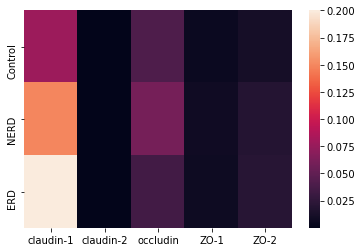

In [21]:
# Create a dataset with appropriate gene label for each column
CNE = pd.DataFrame(research, columns=["claudin-1","claudin-2","occludin","ZO-1","ZO-2"])

# Plot heatmap with set label for Y-Axis ticks
sns.heatmap(CNE, yticklabels=["Control", "NERD", "ERD"])
sns.color_palette("crest", as_cmap=True)

### Analysis of the Results

The plot above reveals the level of tight junction gene (Claudin-1,-2, Occludin, Zo-1, -2) expression between patients with erosive reflux disease, non-erosive reflux disease, and a healthy control group. According to the plot, the lighter color the cell on the matrix, the greater the gene expression, and vice versa. Claudin-1 gene expression demonstrates the greatest increase in gene expression associated with an increase in GERD symptoms---control 0.078, NERD 0.150, and ERD 0.200. ZO-2 also demonstrates an increase in expression with an increase in GERD symptoms---control 0.011, NERD 0.019, and ERD 0.021. The remaining tight junction proteins (Claudin-2, Occludin-2, and ZO-1) demonstrates no significant positive association, as shown on the plot with the lack of color gradient. Thus, these results support my hypothesis gastro-esophageal symptoms will more likely occur with Claudin-1 gene over expression.